In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

DATA_PATH = '../thesis_task/imagedata'

if os.path.exists(DATA_PATH):
    folders = [folder for folder in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, folder))]
    print("Folders inside 'imagedata':")
    for folder in folders:
        print(folder)
else:
    print(f"Directory '{DATA_PATH}' not found.")

def load_data(dataset_path, test_size=0.3):
    data = []
    labels = []

    # Loop over the folders in the dataset_path
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):
            continue
        
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image = cv2.imread(image_path)
            
            # Check if the image was loaded successfully
            if image is None:
                print(f"Warning: Could not load image at {image_path}. Skipping.")
                continue
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB
            image = cv2.resize(image, (224, 224))  # Resize image to match model's expected input
            
            image = img_to_array(image)
            data.append(image)
            labels.append(folder)
            
    # Convert data and labels to numpy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels)

    # Perform one-hot encoding on the labels
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = to_categorical(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)

    # Data augmentation
    train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=preprocess_input
    )

    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Fit the augmentation method to the data
    train_datagen.fit(X_train)
    test_datagen.fit(X_test)

    return train_datagen.flow(X_train, y_train, batch_size=32), test_datagen.flow(X_test, y_test, batch_size=32), le

# Usage
train_generator, test_generator, label_encoder = load_data(DATA_PATH)


Folders inside 'imagedata':
ABDULLAH AL SHAHRIAR
AL-NAFI
ASHIK AHAMED
BISHANATH TARAFDER
BORSHON ALFRED GOMES
ELMA ISLAM
ESM-E MOULA CHOWDHURY ABHA
FAHIM RAHMAN
FAIZA BINTE ZAMAN
IMAM HASAN JAMI
MD ABU ZAYED KHAN
MD ATIK ULLAH KHAN
MD FARDIN AMIN RIYAD
MD IMTIAJ ALAM SAJIN
MD JAHID HASSAN
MD MUNTASIR AREFIN NAEEM
MD NAFIZ AHMED
MD NAIMUR RAHMAN
MD SAJID ISLAM KHAN
MD SHANZID HASAN
MD TOYABUR RAHAMAN
MD WAHIDUZZAMAN SUVA
MOHAMMAD BIN AB JALIL SHEAKH
MOHAMMAD NUR
MOHAMMED TANVIR HASSAN
NAFIS MUBASSHIR SHAH
NAHAR ISLAM NISHI
NAVID MAHFUZ NAYEEM
RAHAD-UL-ISLAM RABBY
REZWAN AHMAD
S M FAISAL
SABBIR AHMED
SADAT BIN MASUD
SATYAJIT DAS
SHEIKH AKIB ALMAS
SRABONE RAXIT
SYEDA HUMAIRA JABEEN
TAHMID AL RAFID SIDDIQUE
TARIKUL ISLAM NISHAT
THASNOVA SININ


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the MobileNetV2 model with pre-trained weights, excluding the fully connected layers at the top
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') 
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

# Train the model
H = model.fit(train_generator, epochs=500, validation_data=test_generator)

# Save the model
model.save('face_recognition_model.h5')

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
15/15 [==============================] - 11s 592ms/step - loss: 4.0225 - accuracy: 0.0218 - val_loss: 3.6989 - val_accuracy: 0.0152
Epoch 2/500
15/15 [==============================] - 10s 651ms/step - loss: 3.8599 - accuracy: 0.0327 - val_loss: 3.6395 - val_accuracy: 0.0202
Epoch 3/500
15/15 [==============================] - 10s 653ms/step - loss: 3.7670 - accuracy: 0.0370 - val_loss: 3.5824 - val_accuracy: 0.0202
Epoch 4/500
15/15 [==============================] - 9s 607ms/step - loss: 3.6534 - accuracy: 0.0850 - val_loss: 3.5090 - val_accuracy: 0.1616
Epoch 5/500
15/15 [==============================] - 9s 575ms/step - loss: 3.5047 - accuracy: 0.1046 - val_loss: 3.4356 - val_accuracy: 0.1919
Epoch 6/500
15/15 [==============================] - 9s 571ms/step - loss: 3.4181 - accuracy: 0.1503 - val_loss: 3.3479 - val_accuracy: 0.2475
Epoch 7/500
15/15 [==============================] - 9s 602ms/step - loss: 3.3234 - accuracy: 0.1765 - val_loss: 3.2612 - val_accuracy: 0.2

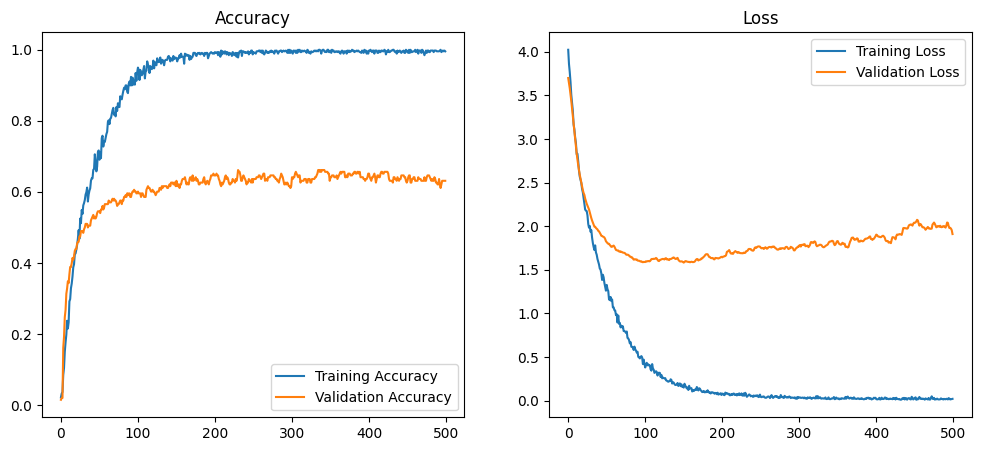

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [5]:
import os
import cv2
from PIL import Image
import numpy as np
from PIL import Image, UnidentifiedImageError

# Path to your dataset
DATASET_PATH = '../thesis_task/imagedata'

# Ensure OpenCV 'face' module is available
if not hasattr(cv2, 'face'):
    raise AttributeError("The cv2 module does not have the attribute 'face'. Please ensure you have 'opencv-contrib-python' installed.")

# LBPH recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Haar Cascade for face detection
detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Function to process an image and return face samples and their IDs
def process_image(image_path, label):
    try:
        PIL_img = Image.open(image_path).convert('L')  # Convert it to grayscale
        img_numpy = np.array(PIL_img, 'uint8')
    except UnidentifiedImageError:
        print(f"Skipping unsupported image file {image_path}")
        return [], []

    faces = detector.detectMultiScale(img_numpy)
    face_samples, ids = [], []

    for (x, y, w, h) in faces:
        face_samples.append(img_numpy[y:y+h, x:x+w])
        ids.append(label)

    return face_samples, ids


faces, ids = [], []

# Enumerate over folders in the dataset path
for label, person_name in enumerate(os.listdir(DATASET_PATH)):
    person_path = os.path.join(DATASET_PATH, person_name)
    if not os.path.isdir(person_path):
        continue

    # Enumerate over images in each person's folder
    for image_name in os.listdir(person_path):
        image_path = os.path.join(person_path, image_name)
        face_samples, face_ids = process_image(image_path, label)
        faces.extend(face_samples)
        ids.extend(face_ids)

# Train the model
print("\n[INFO] Training faces. It will take a few seconds. Wait ...")
recognizer.train(faces, np.array(ids))

# Save the model into a file
recognizer.write('trainer.yml')

print(f"\n[INFO] {len(np.unique(ids))} faces trained. Exiting Program.")



[INFO] Training faces. It will take a few seconds. Wait ...

[INFO] 40 faces trained. Exiting Program.


In [6]:
import cv2
import numpy as np
from PIL import Image

# Load the trained model
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer.yml')

# Initialize the Haar Cascade face detection model
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
# Create a dictionary to map labels to person names
label_names = {}

# Loop through the folders in your dataset
for label, folder_name in enumerate(os.listdir(DATASET_PATH)):
    # Check if it's a directory
    if os.path.isdir(os.path.join(DATASET_PATH, folder_name)):
        # Assume folder name is the person's name
        label_names[label] = folder_name


In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import random

# Step 1: Load the dataset and shuffle it
def load_and_shuffle_dataset(dataset_path):
    data = []
    labels = []
    
    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if os.path.isdir(person_path):
            for img_name in os.listdir(person_path):
                img_path = os.path.join(person_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                data.append(img)
                labels.append(person_name)
    
    # Combine data and labels into a list of tuples
    dataset = list(zip(data, labels))
    
    # Shuffle the dataset
    random.shuffle(dataset)
    
    # Unzip shuffled dataset
    data_shuffled, labels_shuffled = zip(*dataset)
    
    return np.array(data_shuffled), np.array(labels_shuffled)

# Step 2: Preprocess the data and train the model
def train_model(dataset_path):
    # Load and shuffle the dataset
    data, labels = load_and_shuffle_dataset(dataset_path)
    
    # Encode labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)
    
    # Train the model
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train.reshape(len(X_train), -1), y_train)
    
    # Evaluate the model
    accuracy = model.score(X_test.reshape(len(X_test), -1), y_test)
    print("Model accuracy:", accuracy)
    
    return model, label_encoder

# Step 3: Perform face recognition
# (Remaining code remains unchanged)


In [9]:
# Open the default camera
cap = cv2.VideoCapture(0)

while True:
    # Read a frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_detector.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Recognize the face
        id, confidence = recognizer.predict(gray[y:y+h, x:x+w])

        # Check if the recognizer is confident enough
        if confidence < 100:
            name = label_names.get(id, "Unknown")
            confidence_text = f"{confidence:.2f}%"
        else:
            name = "Unknown"
            confidence_text = f"{confidence:.2f}%"

        cv2.putText(frame, f"{name} - {confidence_text}", (x+5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame with detected faces
    cv2.imshow('Camera', frame)

    # Break the loop with the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()
